# GOD1_RSM 2023
ADVERTISING DATA MODELING 
CONTACT: mahlaranjeet@gmail.com
DR RANJEET SINGH MAHLA 

REQUIREMENTS

In [22]:
import pandas as pd
import streamlit as st
import plotly.express as px
from numerize.numerize import numerize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ALOS THE REQUIREMENTS CAN BE MADE VIA 
pip install -r /Users/rmahla_admin/Desktop/Facebook_Ad_Campaign_Dashboard/requirements.txt

In [26]:
df = pd.read_csv("/Users/rmahla_admin/Desktop/GOD1_RSM/data/data.csv")
df

,date,ad_id,campaign,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,2021-01-01,708746,Campaign A,103916,30-34,Male,15,7350,1,1.430000,2,1
1,2021-01-02,708749,Campaign A,103917,30-34,Male,16,17861,2,1.820000,2,0
2,2021-01-03,708771,Campaign A,103920,30-34,Male,20,693,0,0.000000,1,0
3,2021-01-04,708815,Campaign A,103928,30-34,Male,28,4259,1,1.250000,1,0
4,2021-01-05,708818,Campaign A,103928,30-34,Male,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2022-09-13,1314410,Campaign C,179977,45-49,Female,109,1129773,252,358.189997,13,2
1139,2022-09-14,1314411,Campaign C,179978,45-49,Female,110,637549,120,173.880003,3,0
1140,2022-09-15,1314412,Campaign C,179979,45-49,Female,111,151531,28,40.289999,2,0
1141,2022-09-16,1314414,Campaign C,179981,45-49,Female,113,790253,135,198.710001,8,2


LETS HAVE A LOOK ON DATA

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1143 non-null   object 
 1   ad_id                1143 non-null   int64  
 2   campaign             1143 non-null   object 
 3   fb_campaign_id       1143 non-null   int64  
 4   age                  1143 non-null   object 
 5   gender               1143 non-null   object 
 6   interest             1143 non-null   int64  
 7   Impressions          1143 non-null   int64  
 8   Clicks               1143 non-null   int64  
 9   Spent                1143 non-null   float64
 10  Total_Conversion     1143 non-null   int64  
 11  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 107.3+ KB


In [28]:
df.describe()

,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [30]:
df['Impressions'].unique()
df['Spent'].unique()
# THE SAME CAN BE DONE WITH ALL OTHER VARIABLES

array([1.42999995e+00, 1.82000002e+00, 0.00000000e+00, 1.25000000e+00,
       1.28999996e+00, 4.76999998e+00, 1.26999998e+00, 1.50000000e+00,
       3.15999997e+00, 1.02800002e+01, 5.69999993e-01, 1.69000006e+00,
       4.63000011e+00, 2.60999990e+00, 3.04999995e+00, 3.05999994e+00,
       2.98000002e+00, 5.52000010e+00, 8.47000015e+00, 1.58200002e+01,
       1.47000003e+00, 1.52999997e+00, 1.80699997e+01, 1.61000001e+00,
       1.19000006e+00, 9.22000027e+00, 1.50999999e+00, 9.43000007e+00,
       6.96000004e+00, 1.22000003e+00, 2.79999995e+00, 1.60000002e+00,
       1.12999999e+00, 5.73000002e+00, 9.38000000e+00, 5.63000000e+00,
       3.84000003e+00, 1.03999996e+00, 1.46000004e+00, 2.83999991e+00,
       1.35000002e+00, 5.75000000e+00, 3.98000002e+00, 4.44999993e+00,
       1.32000005e+00, 4.09000003e+00, 1.00300001e+01, 4.25000000e+00,
       2.02900003e+01, 1.38999999e+00, 4.44000006e+00, 1.57000005e+00,
       1.40999997e+00, 3.33300000e+01, 3.34000009e+00, 8.05000007e+00,
      

In [32]:
df.corr()['Impressions'].sort_values()
# THE SAME CAN BE DONE FOR ALL OTHER VARIABES

/var/folders/wd/0cjqfxsd7zjc3gx989xp40980000gt/T/ipykernel_18650/1950083548.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



interest               0.101973
fb_campaign_id         0.439439
ad_id                  0.462308
Approved_Conversion    0.684249
Total_Conversion       0.812838
Clicks                 0.948514
Spent                  0.970386
Impressions            1.000000
Name: Impressions, dtype: float64

/var/folders/wd/0cjqfxsd7zjc3gx989xp40980000gt/T/ipykernel_18650/58359773.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

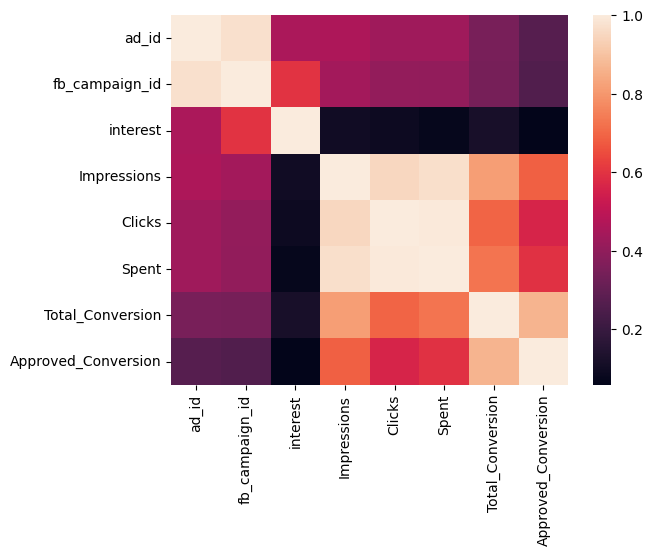

In [31]:
sns.heatmap(df.corr())

COORELATION BETWEEN THE TWO VARIABLES

<AxesSubplot: xlabel='Total_Conversion', ylabel='Approved_Conversion'>

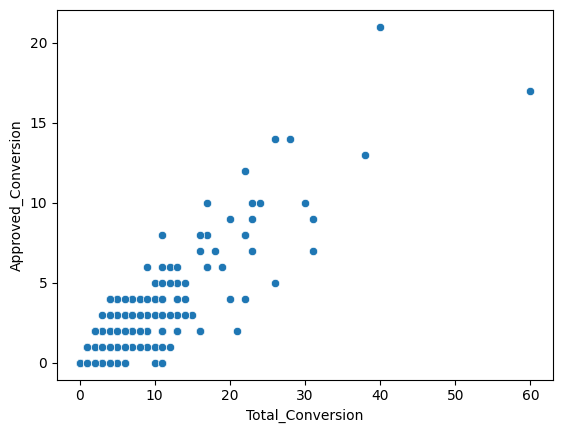

In [33]:
#TOTAL CONVERSIONS VS APPROVED CONVERSIONS
sns.scatterplot(x='Total_Conversion',y='Approved_Conversion',data=df)
# INFERENCE: THE COORELATION SUGGEST THAT MORE INQUIRY MEANS MORE PEOPLE BROUGHT THE PRODUCT

GENDER NORMALIZED REGRESSION

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



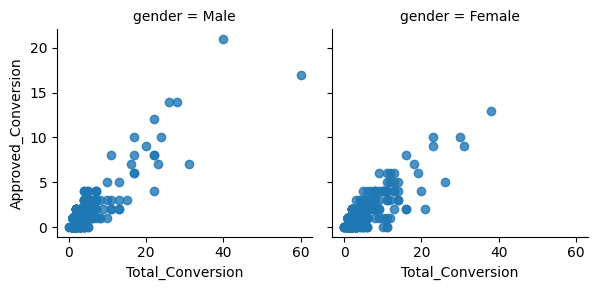

In [34]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.8)
g.add_legend();

# INFERENCE: IT SEEMS MALE HAVE TENDENCY OF BUYING MORE PRODUCT

AGE NORMALIZED REGRESSION

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



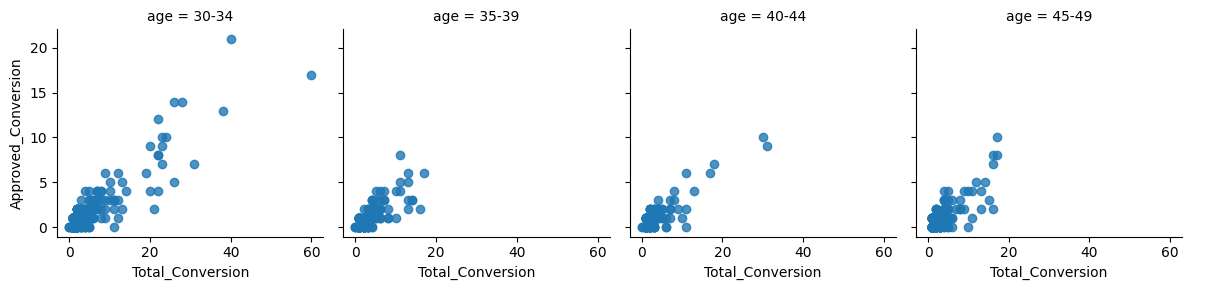

In [35]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.8)
g.add_legend();
# PEOPLE IN AGE GROUP OF 30-34 BUY MORE PRODUCTS 

THE SIMILAR COORELATION CAN BE SEEN WITH RESPECT TO OTHER VARIABLES

In [38]:
df

,date,ad_id,campaign,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,2021-01-01,708746,Campaign A,103916,30-34,Male,15,7350,1,1.430000,2,1
1,2021-01-02,708749,Campaign A,103917,30-34,Male,16,17861,2,1.820000,2,0
2,2021-01-03,708771,Campaign A,103920,30-34,Male,20,693,0,0.000000,1,0
3,2021-01-04,708815,Campaign A,103928,30-34,Male,28,4259,1,1.250000,1,0
4,2021-01-05,708818,Campaign A,103928,30-34,Male,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2022-09-13,1314410,Campaign C,179977,45-49,Female,109,1129773,252,358.189997,13,2
1139,2022-09-14,1314411,Campaign C,179978,45-49,Female,110,637549,120,173.880003,3,0
1140,2022-09-15,1314412,Campaign C,179979,45-49,Female,111,151531,28,40.289999,2,0
1141,2022-09-16,1314414,Campaign C,179981,45-49,Female,113,790253,135,198.710001,8,2


In [39]:
# CONVERT STRING FOR CATEGORICAL VARIABLES
df['interest'] = df['interest'].apply(str)
df['campaign']=df['campaign'].apply(str)
df['campaign'].unique()

array(['Campaign A', 'Campaign B', 'Campaign C'], dtype=object)

CAMPAIGN WISE ADD RUN

<AxesSubplot: xlabel='campaign', ylabel='count'>

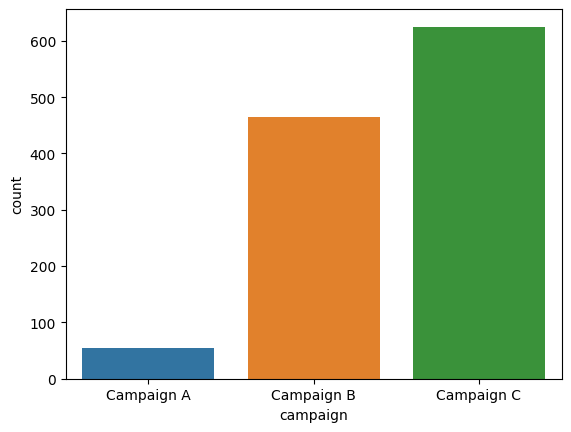

In [41]:
sns.countplot(data=df, x='campaign')

Text(0.5, 1.0, 'Campaigns vs Conversion')

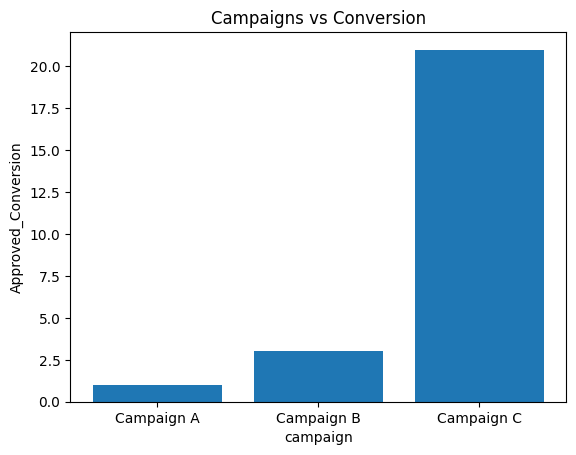

In [42]:
# CAMPAIGN VERSUS APPROVED CONVERSION  
plt.bar(df["campaign"], df["Approved_Conversion"])
plt.ylabel('Approved_Conversion')
plt.xlabel('campaign')
plt.title('Campaigns vs Conversion')
##campaign 1178 yields more conversions as expected. 

AGE NORMALIZED COMPAIGN VERSUS APPROVED CONVERSIONS

In [43]:
df['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

<AxesSubplot: xlabel='campaign', ylabel='Approved_Conversion'>

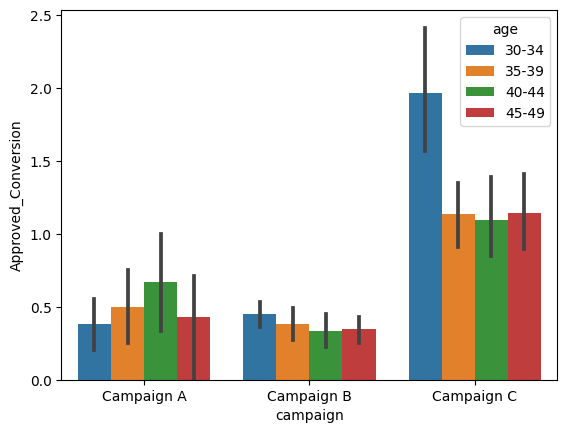

In [44]:
sns.barplot(x=df["campaign"], y=df["Approved_Conversion"], hue=df["age"], data=df)

GENDER NORMALIZED COMPAIGN VERSUS APPROVED CONVERSIONS

<AxesSubplot: xlabel='campaign', ylabel='Approved_Conversion'>

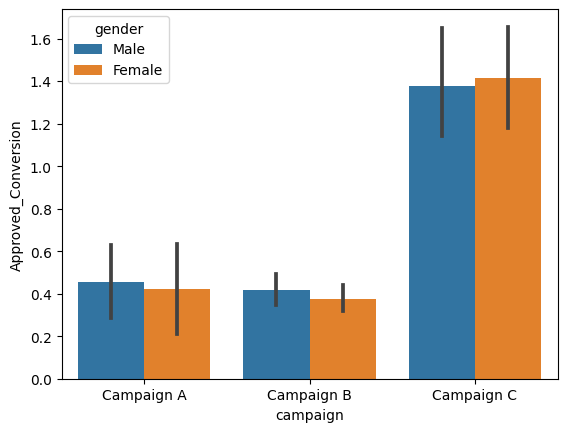

In [45]:
sns.barplot(x=df["campaign"], y=df["Approved_Conversion"], hue=df["gender"], data=df)

INTERESTS VS APPROVED CONVERSIONS

<AxesSubplot: xlabel='interest', ylabel='Approved_Conversion'>

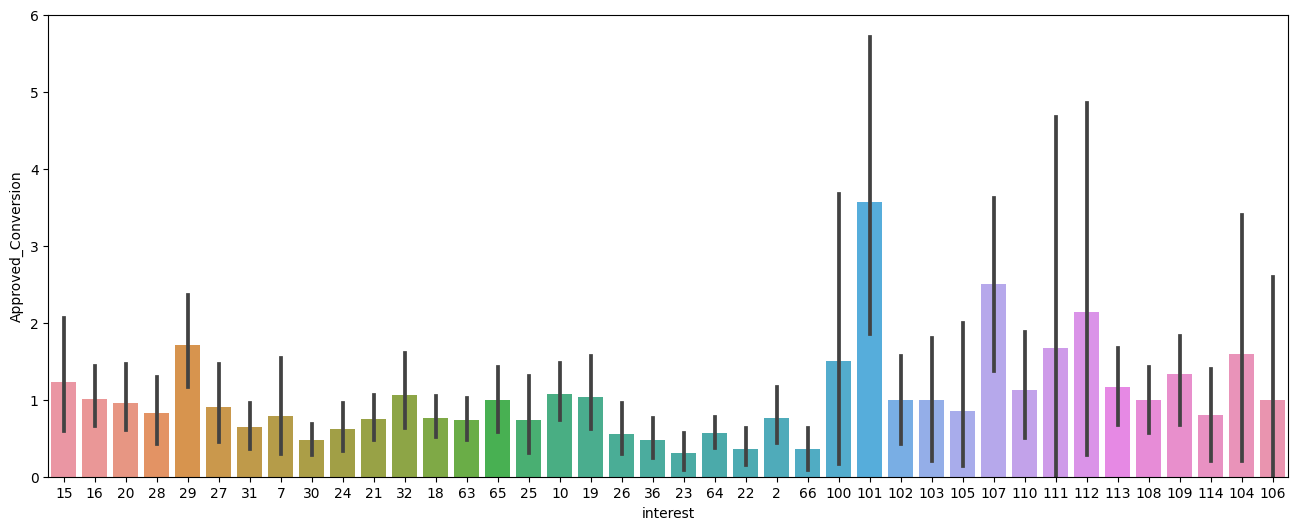

In [46]:
df['interest'].unique()
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=df, x="interest", y="Approved_Conversion")

IMPRESSIONS VERSUS APPROVED CONVERSIONS

<AxesSubplot: xlabel='Impressions', ylabel='Approved_Conversion'>

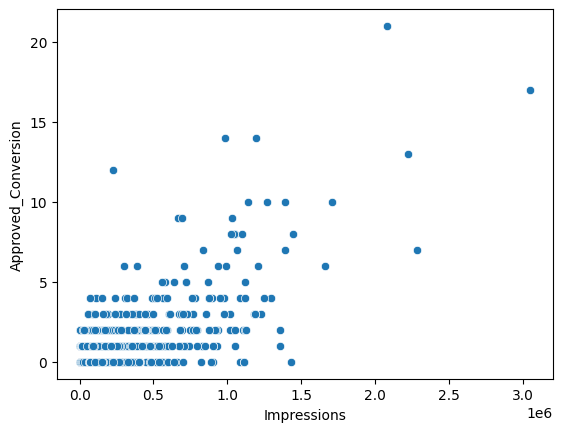

In [47]:
sns.scatterplot(data=df, x='Impressions',y='Approved_Conversion')

CLICSK VS APPROVED CONVERSIONS

<AxesSubplot: xlabel='Clicks', ylabel='Approved_Conversion'>

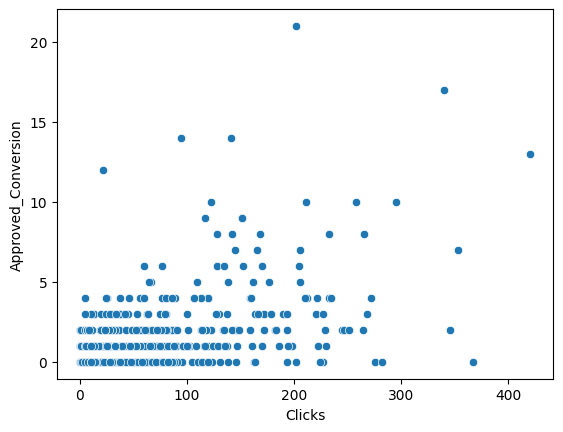

In [48]:
sns.scatterplot(data=df, x='Clicks',y='Approved_Conversion')

CLICK VS IMPRESSIONS

<AxesSubplot: xlabel='Impressions', ylabel='Clicks'>

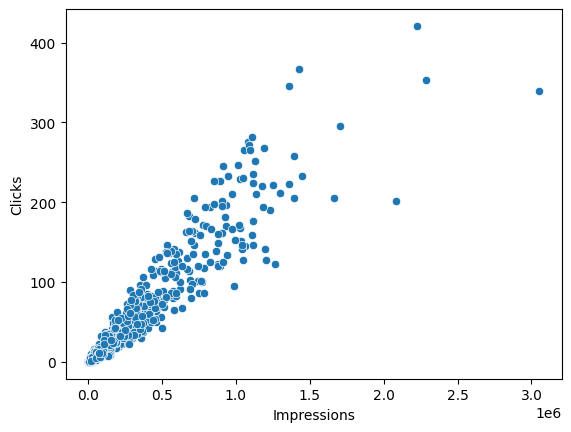

In [49]:
sns.scatterplot(data=df, x='Impressions',y='Clicks')

AGE NORMALIZED CLICK VERSUS APPROVED CONVERSIONS 
AGE RANGE THAT BUYS THE PRODUCT AFTER CLICKING THE ADD

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



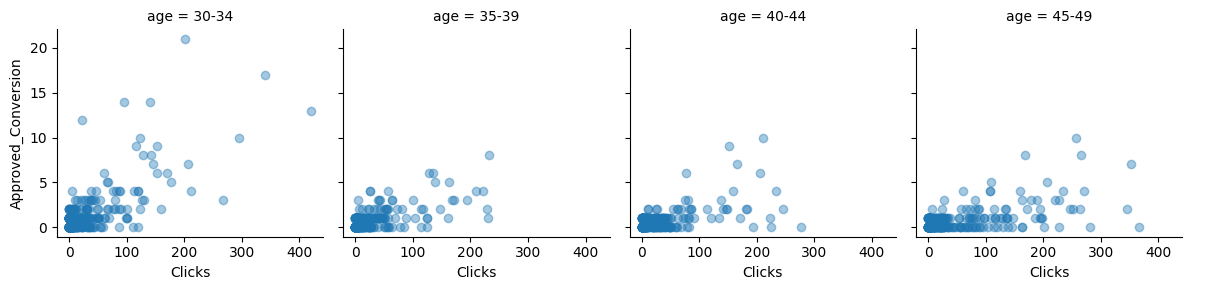

In [50]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

In [ ]:
GENDER NORMALIZED CLICK VERSUS APPROVED CONVERSIONS
GNDER THAT BUYS THE PRODUCT AFTER CLICKING THE ADD

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



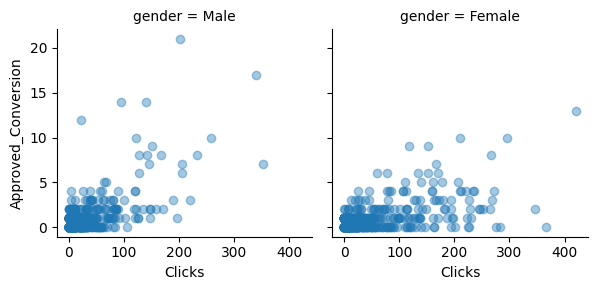

In [51]:

g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();



CAMPAIGN C

In [55]:

a=[]
b=[]
c=[]
for i,j,k in zip(df.campaign, df.fb_campaign_id, df.Approved_Conversion):
    if i=="Campaign C":
      a.append(i),b.append(j),c.append(k)


In [56]:
# CREATE A DATAFRAME FOR THE MOST RUN CAMPAIGN ID WITH THIER CONVERSIONS 
campaign_1178={'Campaign C':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_1178=pd.DataFrame(campaign_1178)
campaign_1178

,Campaign C,fb_campaign_id,Approved_Conversion
0,Campaign C,144531,14
1,Campaign C,144531,5
2,Campaign C,144531,1
3,Campaign C,144531,2
4,Campaign C,144531,2
...,...,...,...
620,Campaign C,179977,2
621,Campaign C,179978,0
622,Campaign C,179979,0
623,Campaign C,179981,2


/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'fb_campaign_id vs. Approved_Conversion for campaign_c')

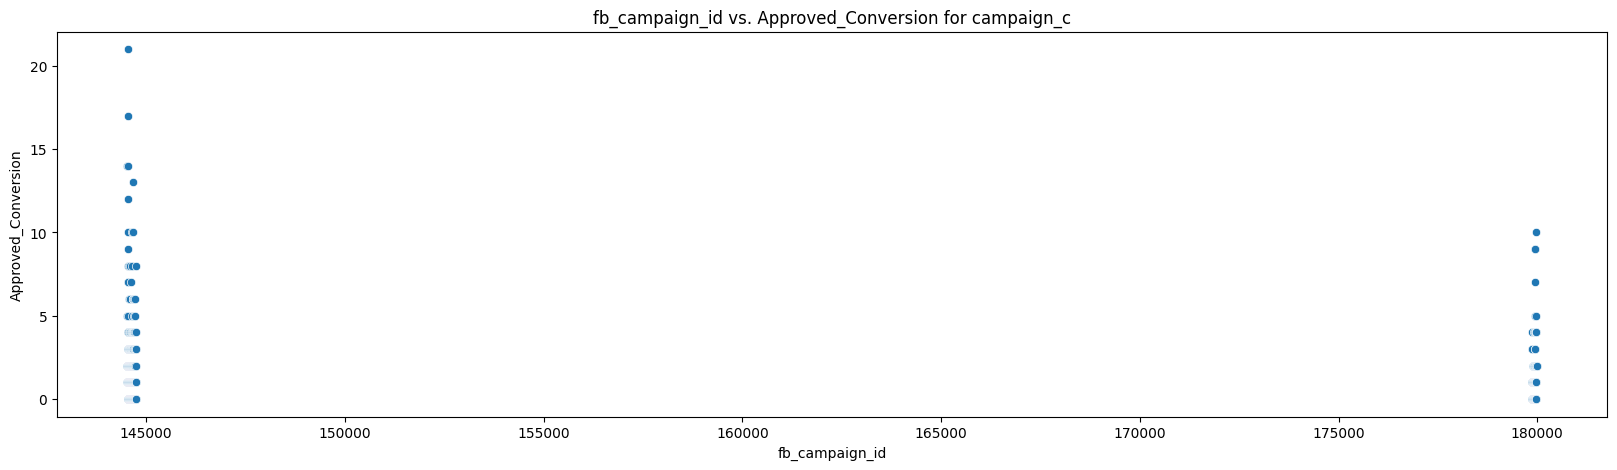

In [57]:
# relationship between fb_campaign_id and Approved_Conversion for campaign C
plt.figure(figsize=(20,5))
sns.scatterplot(campaign_1178["fb_campaign_id"], campaign_1178["Approved_Conversion"])
plt.title("fb_campaign_id vs. Approved_Conversion for campaign_c")

INFERENCE: SMALLER ID HAVE MORE CONVERSION THAN LARGER CONVERSION ID

CATEGORICAL DATA THAT CAN FIT INTO MODEL

In [58]:
df.select_dtypes(include='object')

,date,campaign,age,gender,interest
0,2021-01-01,Campaign A,30-34,Male,15
1,2021-01-02,Campaign A,30-34,Male,16
2,2021-01-03,Campaign A,30-34,Male,20
3,2021-01-04,Campaign A,30-34,Male,28
4,2021-01-05,Campaign A,30-34,Male,28
...,...,...,...,...,...
1138,2022-09-13,Campaign C,45-49,Female,109
1139,2022-09-14,Campaign C,45-49,Female,110
1140,2022-09-15,Campaign C,45-49,Female,111
1141,2022-09-16,Campaign C,45-49,Female,113


In [59]:
df_objs = df.select_dtypes(include='object')
df_nums = df.select_dtypes(exclude='object')
df_nums.drop(['ad_id','fb_campaign_id'], axis=1, inplace = True)
df_objs = pd.get_dummies(df_objs,drop_first=True)
final_df = pd.concat([df_nums,df_objs],axis=1)
final_df

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,date_2021-01-02,date_2021-01-03,date_2021-01-04,date_2021-01-05,date_2021-01-06,...,interest_29,interest_30,interest_31,interest_32,interest_36,interest_63,interest_64,interest_65,interest_66,interest_7
0,7350,1,1.430000,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17861,2,1.820000,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,693,0,0.000000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4259,1,1.250000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4133,1,1.290000,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,637549,120,173.880003,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,151531,28,40.289999,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,790253,135,198.710001,8,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


LINEAR REGRESSION

In [60]:
X = final_df.drop('Approved_Conversion',axis=1)
y = final_df['Approved_Conversion']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import ElasticNet
base_elastic_model = ElasticNet()

In [63]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)


In [66]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [68]:
y_pred = grid_model.predict(scaled_X_test)

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [70]:
mean_absolute_error(y_test,y_pred)

0.7047461936052075

In [71]:
mean_squared_error(y_test,y_pred)

0.8555387921686077

In [98]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9249533999984041

In [99]:
np.mean(df['Approved_Conversion'])

0.9440069991251093

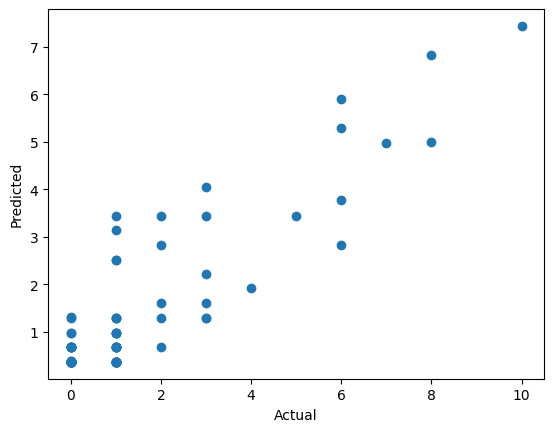

In [100]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [101]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
284,0,0.976857,-0.976857
448,0,0.361330,-0.361330
842,1,1.284620,-0.284620
36,1,0.361330,0.638670
927,1,0.361330,0.638670
...,...,...,...
1107,5,3.438963,1.561037
584,1,2.515673,-1.515673
179,0,0.361330,-0.361330
779,1,0.361330,0.638670


In [102]:
np.mean(pred_df['Difference'])

0.07354762773939506

MODEL USABILITY
THE RMS ERROR IS CLOSE TO THE AVARAGE CONVERSION FEATURE
THE MODEL CAN BE USED FOR PREDICTION OF NEW DATA